In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.isin([0]).sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History       102
Property_Area          0
Loan_Status            0
dtype: int64

In [8]:
df.drop('Loan_ID' , axis=1 , inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


<h2>Data Preprocessing </h2>

In [9]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [10]:
df['Gender'].fillna('Male' ,  inplace=True)

df['Gender'].isna().sum()

0

In [11]:
df['Gender']=df['Gender'].apply( lambda x:x.replace('Male','0'))
df['Gender']=df['Gender'].apply( lambda x:x.replace('Female','1'))
df['Gender']=df['Gender'].astype(int)
df['Gender'].head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int32

In [12]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
df['Married'].fillna('No' ,  inplace=True)

df['Married'].isna().sum()

0

In [14]:
df['Married']=df['Married'].apply( lambda x:x.replace('No','0'))
df['Married']=df['Married'].apply( lambda x:x.replace('Yes','1'))
df['Married']=df['Married'].astype(int)
df['Married'].head()

0    0
1    1
2    1
3    1
4    0
Name: Married, dtype: int32

In [15]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [16]:
df['Education']=df['Education'].apply( lambda x:x.replace('Not Graduate','0'))
df['Education']=df['Education'].apply( lambda x:x.replace('Graduate','1'))
df['Education']=df['Education'].astype(int)
df['Education'].head()

0    1
1    1
2    1
3    0
4    1
Name: Education, dtype: int32

In [17]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [18]:
df['Dependents'].fillna('0' ,  inplace=True)

df['Dependents'].isna().sum()

0

In [19]:
df['Dependents']=df['Dependents'].apply( lambda x:x.replace('3+','3'))
df['Dependents']=df['Dependents'].astype(int)
df['Dependents'].head()

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: int32

In [20]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [21]:
df['Self_Employed'].fillna('No' ,  inplace=True)

df['Self_Employed'].isna().sum()

0

In [22]:
df['Self_Employed']=df['Self_Employed'].apply( lambda x:x.replace('No','0'))
df['Self_Employed']=df['Self_Employed'].apply( lambda x:x.replace('Yes','1'))
df['Self_Employed']=df['Self_Employed'].astype(int)
df['Self_Employed'].head()

0    0
1    0
2    1
3    0
4    0
Name: Self_Employed, dtype: int32

In [23]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [24]:
df['LoanAmount'].fillna(df['LoanAmount'].mean() ,  inplace=True)

df['LoanAmount'].isna().sum()

0

In [25]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [26]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean() ,  inplace=True)

df['Loan_Amount_Term'].isna().sum()

0

In [27]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [28]:
df['Property_Area']=df['Property_Area'].apply( lambda x:x.replace('Urban','1'))
df['Property_Area']=df['Property_Area'].apply( lambda x:x.replace('Rural','2'))
df['Property_Area']=df['Property_Area'].apply( lambda x:x.replace('Semiurban','3'))
df['Property_Area']=df['Property_Area'].astype(int)
df['Property_Area'].head()

0    1
1    2
2    1
3    1
4    1
Name: Property_Area, dtype: int32

In [29]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [30]:
df['Loan_Status']=df['Loan_Status'].apply( lambda x:x.replace('N','0'))
df['Loan_Status']=df['Loan_Status'].apply( lambda x:x.replace('Y','1'))
df['Loan_Status']=df['Loan_Status'].astype(int)
df['Loan_Status'].head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [31]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int32
Loan_Status            int32
dtype: object

<h1>Define Outliers </h1>

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,614.0,0.182410,0.386497,0.0,0.00,0.0,0.00,1.0
Married,614.0,0.648208,0.477919,0.0,0.00,1.0,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
Education,614.0,0.781759,0.413389,0.0,1.00,1.0,1.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.833876,0.372495,0.0,1.00,1.0,1.00,1.0


Text(0.5, 0, 'sample')

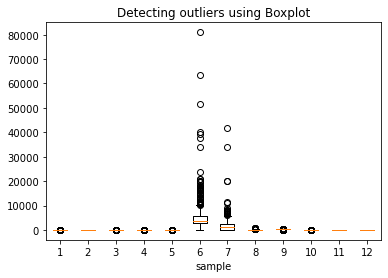

In [33]:
plt.boxplot(df)
plt.title("Detecting outliers using Boxplot")
plt.xlabel("sample")

<h1>Z-Scores </h1>

In [34]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

In [35]:
columns=df.columns
for i in columns:
    out_zscore(df[i])

Total number of outliers are 0
Total number of outliers are 0
Total number of outliers are 0
Total number of outliers are 0
Total number of outliers are 0
Total number of outliers are 8
Total number of outliers are 6
Total number of outliers are 15
Total number of outliers are 12
Total number of outliers are 0
Total number of outliers are 0
Total number of outliers are 0


In [36]:
from scipy import stats
df_zscore=df[(np.abs(stats.zscore(df))<3).all(axis=1)]

In [37]:
for i in columns:
    out_zscore(df_zscore[i])

Total number of outliers are 0
Total number of outliers are 0
Total number of outliers are 0
Total number of outliers are 0
Total number of outliers are 0
Total number of outliers are 17
Total number of outliers are 9
Total number of outliers are 9
Total number of outliers are 41
Total number of outliers are 0
Total number of outliers are 0
Total number of outliers are 0


In [38]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
upper_outliers = Q3+(1.5*IQR)
lower_outliers = Q1-(1.5*IQR)

index =  ~( ( df<lower_outliers )  | (df>upper_outliers) ).any(axis=1)

df_IQR= pd.concat([df.loc[index]] , axis=1)

Text(0.5, 0, 'sample')

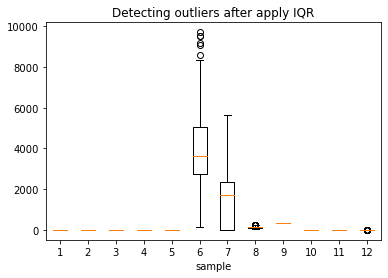

In [39]:
plt.boxplot(df_IQR)
plt.title("Detecting outliers after apply IQR")
plt.xlabel("sample")

In [40]:
df_IQR.shape

(197, 12)

In [41]:
columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

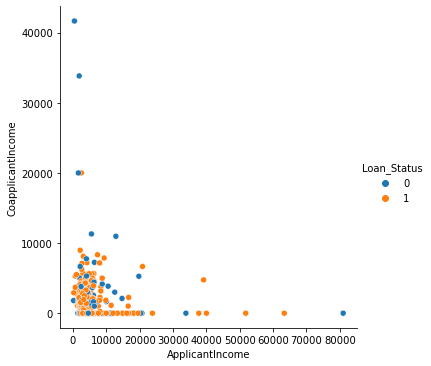

In [42]:
sns.relplot(x='ApplicantIncome', y='CoapplicantIncome', data=df , hue='Loan_Status')

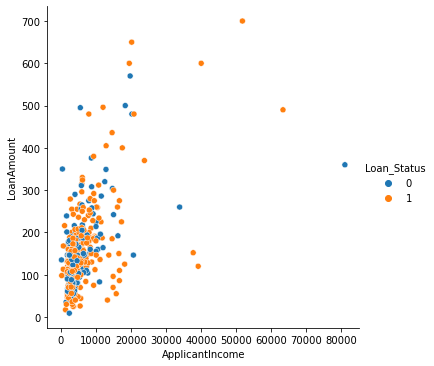

In [43]:

sns.relplot(x='ApplicantIncome', y='LoanAmount', data=df , hue='Loan_Status')

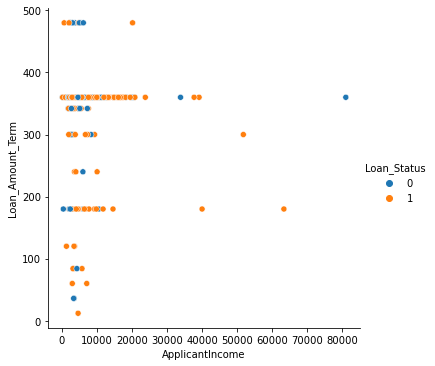

In [44]:
sns.relplot(x='ApplicantIncome', y='Loan_Amount_Term', data=df , hue='Loan_Status')

<h4> After remove outliers we see that, dataset become more inconsistant.
But, real scenario is that, we found outliers in 'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'. which are represnt amount of money.That varies on customer.
so no need to remove outliers from this dataset </h4>

<h1> Data Labeling</h1> 

In [45]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

C:\Users\eusuf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


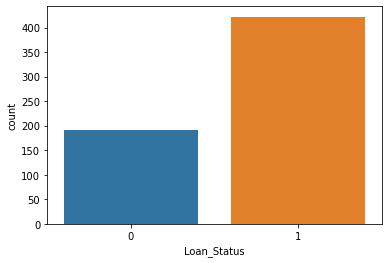

In [46]:
h=sns.countplot(df['Loan_Status'])
h.set_xticklabels(['0','1'])
plt.show()

In [48]:
x=df.drop('Loan_Status' , axis=1)
y=df['Loan_Status']

x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1,2
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1,1


In [91]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote= SMOTE()

x_smote,y_smote = smote.fit_resample(x,y)

In [92]:
print("orginal shape of y : ", Counter(y))
print("resample shape of y: ", Counter(y_smote))

orginal shape of y :  Counter({1: 422, 0: 192})
resample shape of y:  Counter({1: 422, 0: 422})


C:\Users\eusuf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


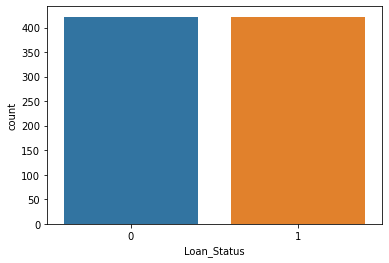

In [93]:
h=sns.countplot(y_smote)
h.set_xticklabels(['0','1'])
plt.show()

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=.25,random_state=1)
x_train.shape

(633, 11)

In [95]:
y_train.shape

(633,)

<h1>Feature Importance for base Model</h1>

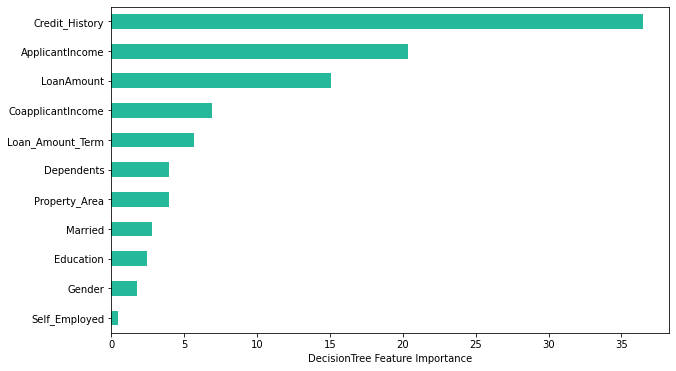

In [96]:
from sklearn import tree

Importance = pd.DataFrame({'Importance':tree.DecisionTreeClassifier(splitter='best',criterion='entropy',max_depth=16).fit(x_train, y_train).feature_importances_*100}, 
                          index = x_train.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = '#25B89B', figsize=(10,6))

plt.xlabel('DecisionTree Feature Importance')
plt.gca().legend_ = None

In [97]:
x_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [98]:
x_train.drop(['Gender', 'Married', 'Dependents', 'Education'] , axis=1, inplace=True)
x_train.head()

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
298,0,5000,2541.0,151.000000,480.0,1,2
563,1,5800,0.0,132.000000,360.0,1,3
487,0,18333,0.0,500.000000,360.0,1,1
662,1,4701,0.0,112.933836,360.0,1,1
552,0,3333,3250.0,158.000000,360.0,1,1


In [99]:
y_train.head()

298    0
563    1
487    0
662    0
552    1
Name: Loan_Status, dtype: int32

In [100]:
x_test.drop(['Gender', 'Married', 'Dependents', 'Education'] , axis=1, inplace=True)

In [101]:
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier()
RFC_model.fit(x_train, y_train)
rfc_pred=RFC_model.predict(x_test)
RFC_model.score(x_train,y_train)

1.0

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rfc_pred)  

array([[88, 26],
       [11, 86]], dtype=int64)

In [103]:
print('Training set score: {:.4f}'.format(RFC_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(RFC_model.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.8246


In [114]:
import pickle
file=open("loan_approve.pkl","wb")
pickle.dump(RFC_model,file)
file.close()

In [115]:
file=open("loan_approve.pkl","rb")
data=pickle.load(file)
file.close()
data

RandomForestClassifier()

In [117]:
data.predict([[0,5000,2541.0,151.000000,480.0,1,2]])

C:\Users\eusuf\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [118]:
data.predict([[1,5800,0.0,132.000000,360.0,1,3]])

C:\Users\eusuf\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [104]:
from sklearn.svm import SVC
SVC_model= SVC()
SVC_model.fit(x_train,y_train)
svc_pred=SVC_model.predict(x_test)
SVC_model.score(x_train,y_train)

0.5576619273301737

In [105]:
confusion_matrix(y_test, svc_pred)

array([[48, 66],
       [42, 55]], dtype=int64)

In [106]:
print('Training set score: {:.4f}'.format(SVC_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(SVC_model.score(x_test, y_test)))

Training set score: 0.5577
Test set score: 0.4882


In [107]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model= KNeighborsClassifier()
KNN_model.fit(x_train,y_train)
knn_pred=KNN_model.predict(x_test)
KNN_model.score(x_train,y_train)

0.7456556082148499

In [108]:
confusion_matrix(y_test, knn_pred)

array([[72, 42],
       [38, 59]], dtype=int64)

In [109]:
print('Training set score: {:.4f}'.format(KNN_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(KNN_model.score(x_test, y_test)))

Training set score: 0.7457
Test set score: 0.6209


In [110]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion='gini', max_depth=16, random_state=0)
DT_model.fit(x_train, y_train)
DT_pred=DT_model.predict(x_test)
DT_model.score(x_train,y_train)

1.0

In [111]:
confusion_matrix(y_test, DT_pred)

array([[87, 27],
       [15, 82]], dtype=int64)

In [112]:
print('Training set score: {:.4f}'.format(DT_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(DT_model.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.8009
